In [2]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [4]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [5]:
#Part 1
dfLE["GDP/Capita"] = dfLE["GDP"]/dfLE["Population"]

print("GDP per Capita")
dfLE["GDP/Capita"].sample(10)

GDP per Capita


12      597.589176
174    2942.049453
173    8566.576027
48      947.134899
78             NaN
119            NaN
15     7893.231084
116            NaN
21     4808.272658
31      378.777345
Name: GDP/Capita, dtype: float64

### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

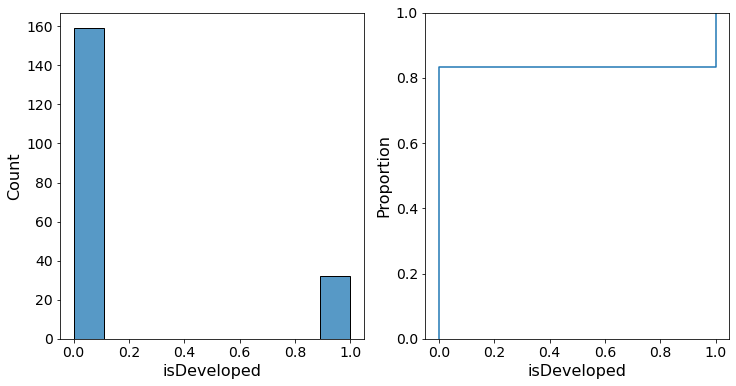

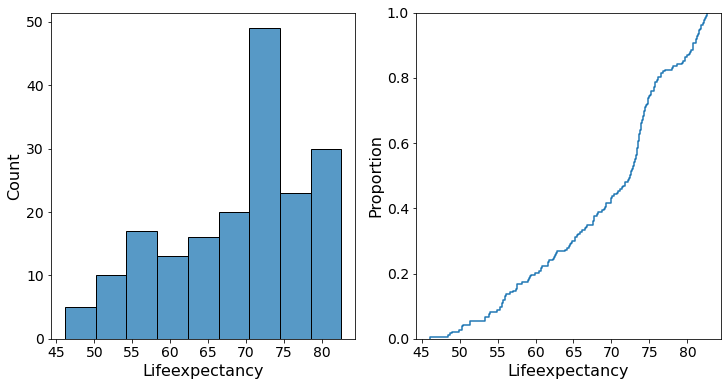

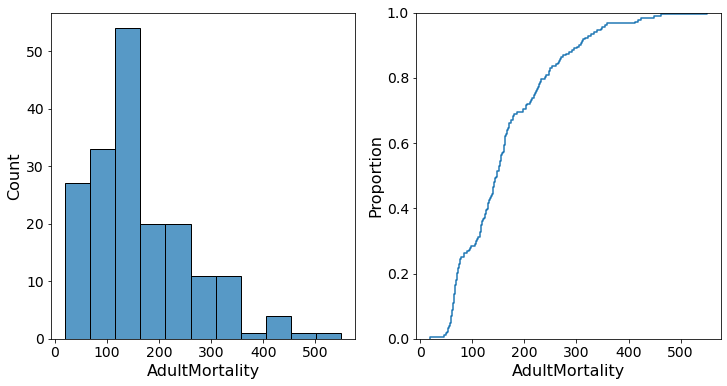

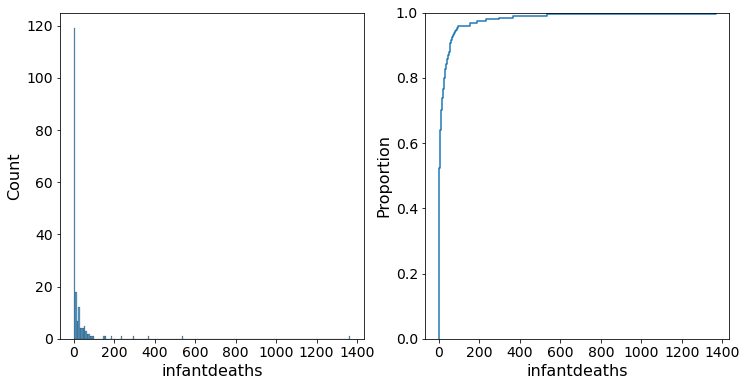

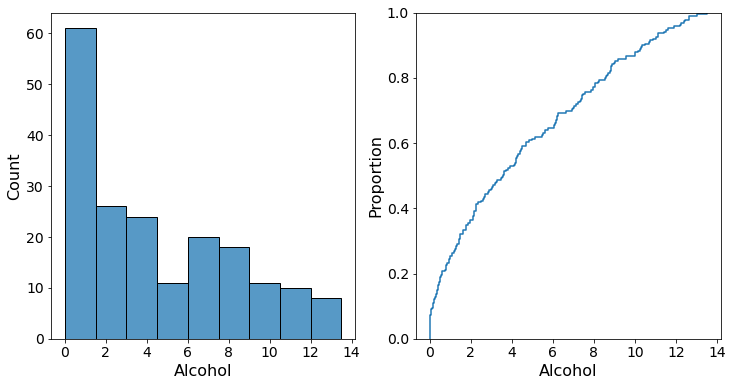

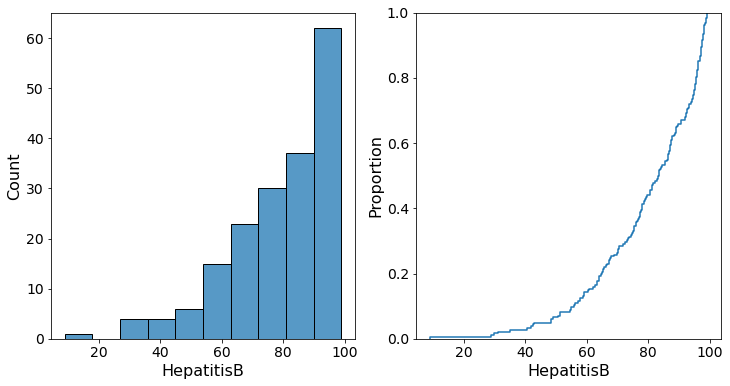

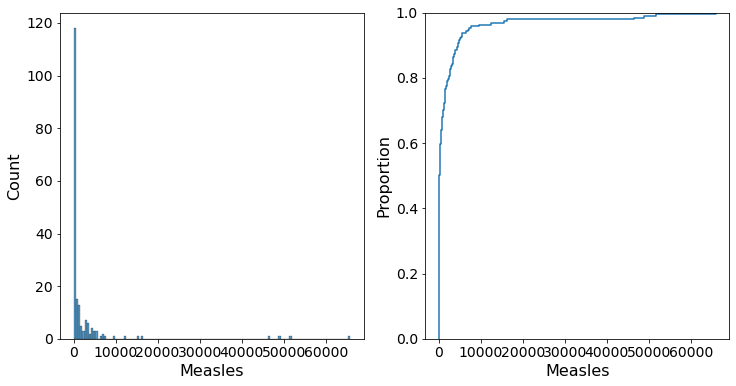

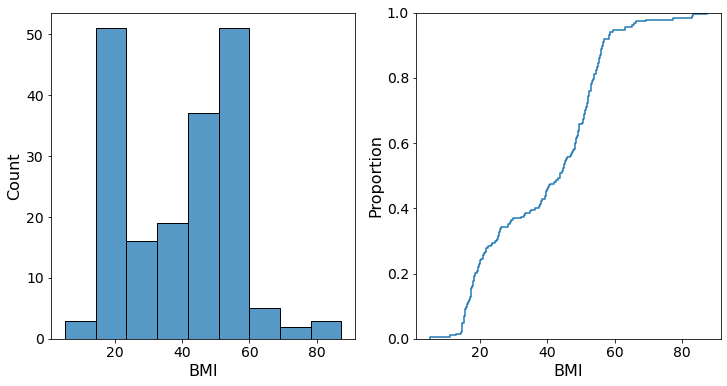

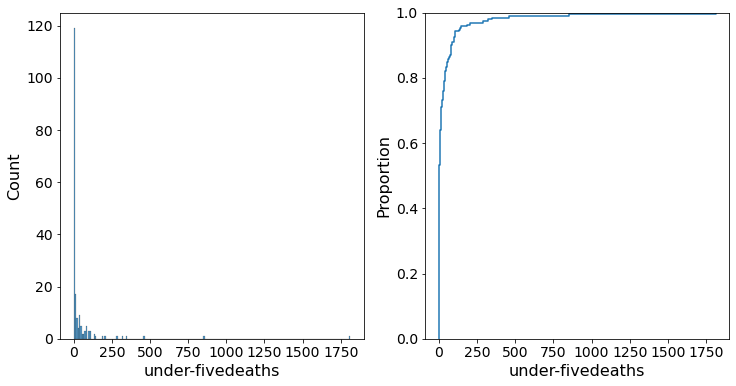

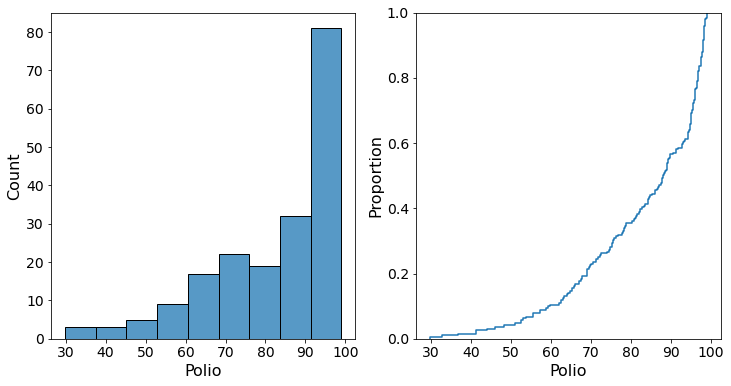

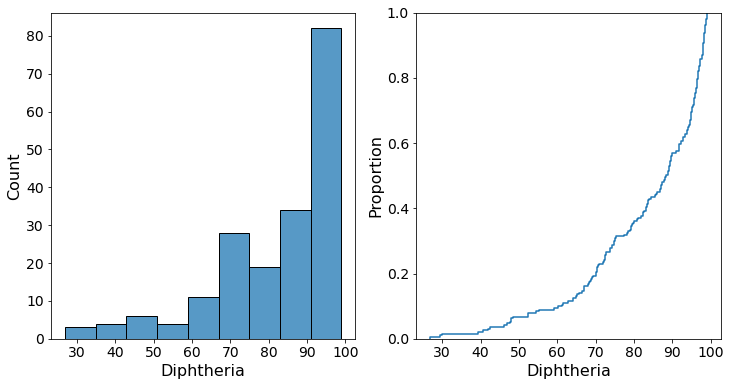

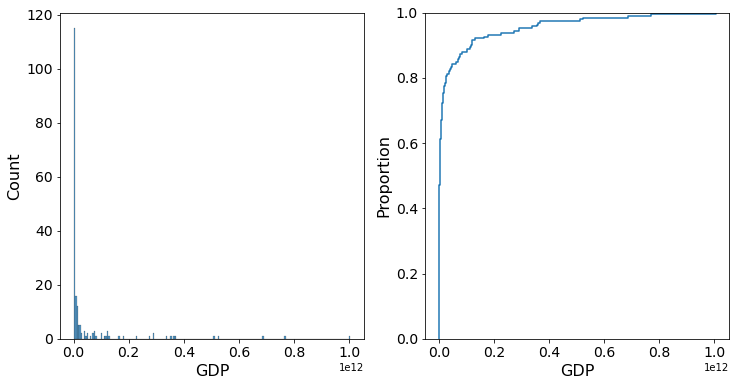

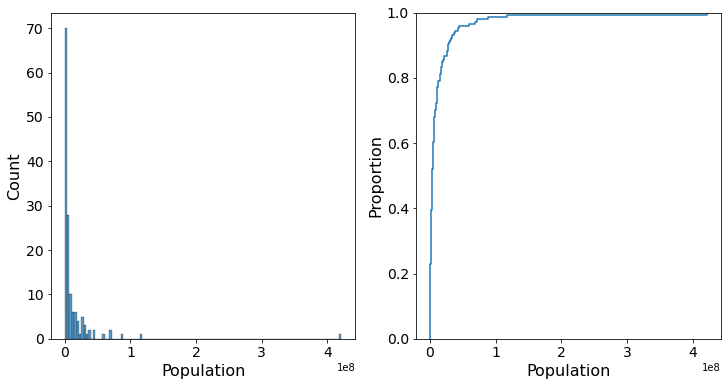

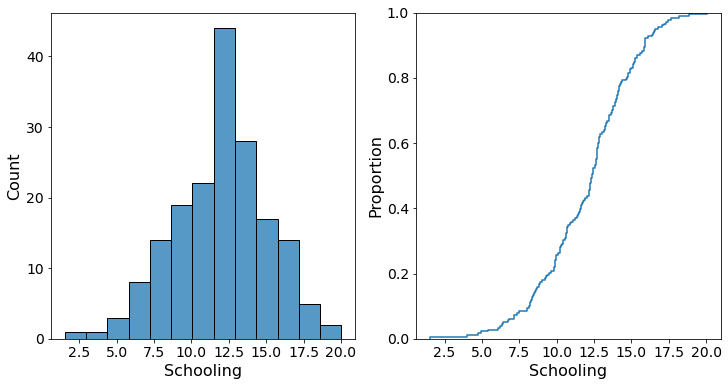

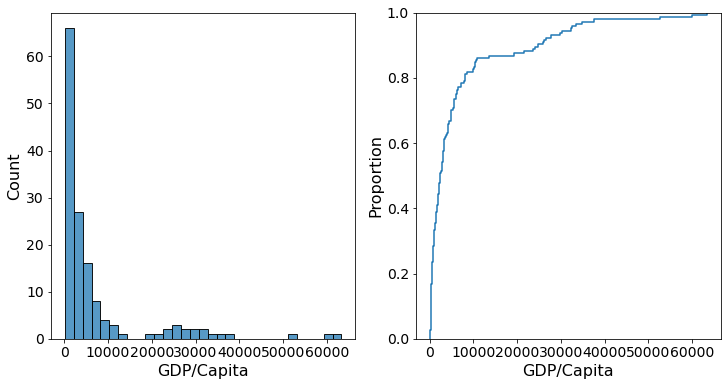

In [14]:
#A function that takes in the dataframe and column and prints the graphs
def plotFrame(df_in,columnName):
    thinkplot.PrePlot(2,1,2)
    thinkplot.SubPlot(1)
    sns.histplot(df_in[columnName])
    thinkplot.bigger_text()
    thinkplot.SubPlot(2)
    sns.ecdfplot(df_in[columnName])
    thinkplot.bigger_text()
    plt.show()


for i in dfLE:
    if i != "Country":
        plotFrame(dfLE,i)

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

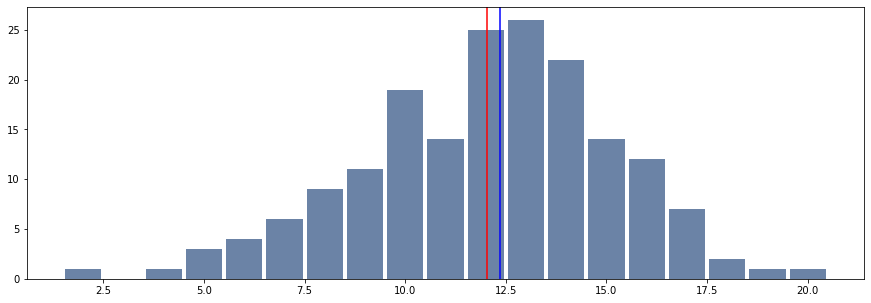

In [17]:
#Analytical for Schooling
schoolHist = thinkstats2.Hist(round(dfLE["Schooling"],0))
thinkplot.Hist(schoolHist)
plt.axvline(dfLE["Schooling"].mean(),color='red')
plt.axvline(dfLE["Schooling"].median(),color='blue')

While there is a difference between the mean and the median which causes a slight left skew, the difference is small enough that a normal distribution would likely fit this data well enough

<AxesSubplot:xlabel='Schooling', ylabel='Count'>

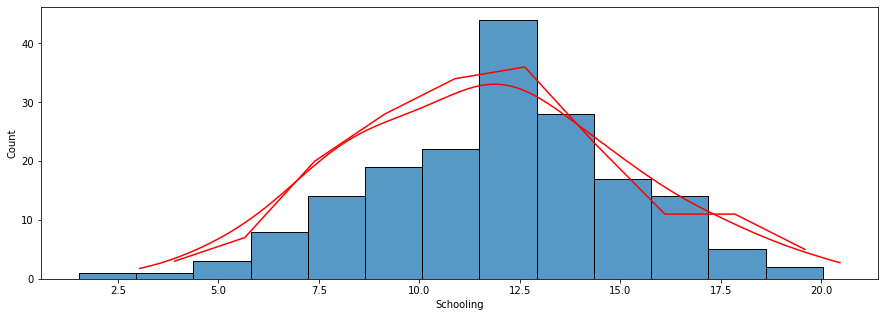

In [18]:
analyticSchool = np.random.normal(dfLE["Schooling"].mean(),dfLE["Schooling"].std(),dfLE["Schooling"].count())
sns.histplot(data=analyticSchool, fill=False, element='poly', color='red', kde=True)
sns.histplot(data=dfLE["Schooling"])

In [42]:
#Find Canada's schooling number and use that to do Percentiles
schoolCDF = thinkstats2.Cdf(analyticSchool)
canadaSchool = dfLE["Schooling"].iloc[30]
print("Percentage of Countries with a Schooling value within 1 of Canada:",(100-schoolCDF.PercentileRank(canadaSchool-1) - (100-schoolCDF.PercentileRank(canadaSchool+1))))

Percentage of Countries with a Schooling value within 1 of Canada: 8.98876404494382


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

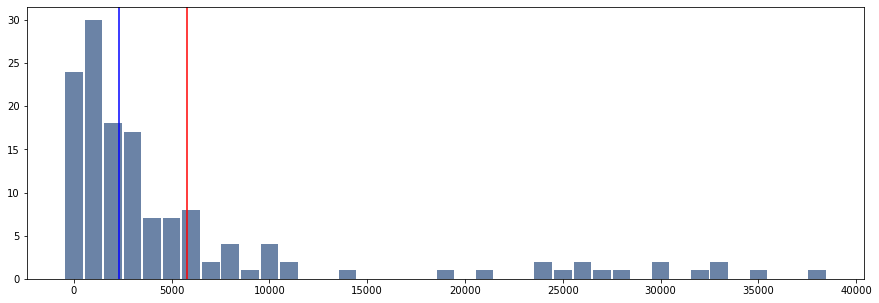

In [89]:
#Analytical for GDP/capita
meanCapita = dfLE["GDP/Capita"].mean()
stdCapita = dfLE["GDP/Capita"].std()

dfCapita = dfLE[dfLE["GDP/Capita"] < 40000]
capitaHist = thinkstats2.Hist(round(dfCapita["GDP/Capita"],-3))
thinkplot.Hist(capitaHist)
plt.axvline(dfCapita["GDP/Capita"].mean(),color='red')
plt.axvline(dfCapita["GDP/Capita"].median(),color='blue')

This data is very clearly LogNormal, as evidenced by the huge right skew in the data

<AxesSubplot:xlabel='GDP/Capita', ylabel='Count'>

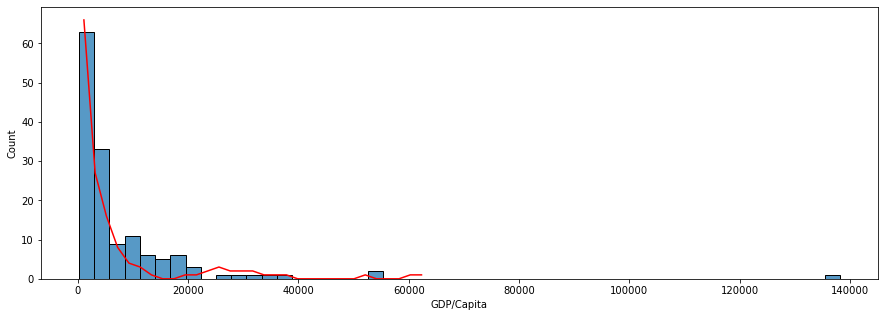

In [94]:
normal_std = np.sqrt(np.log(1 + (stdCapita/meanCapita)**2))
normal_mean = np.log(meanCapita) - normal_std**2 / 2

analyticCapita = np.random.lognormal(normal_mean,normal_std, dfLE["GDP/Capita"].count())
sns.histplot(data=dfLE["GDP/Capita"], fill=False, element='poly', color='red')
sns.histplot(data=analyticCapita)

The GDP/Capita appears mostly accurate, aside from a few massive outliers. Once they have been properly filtered, it should provide more accurate insights.

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

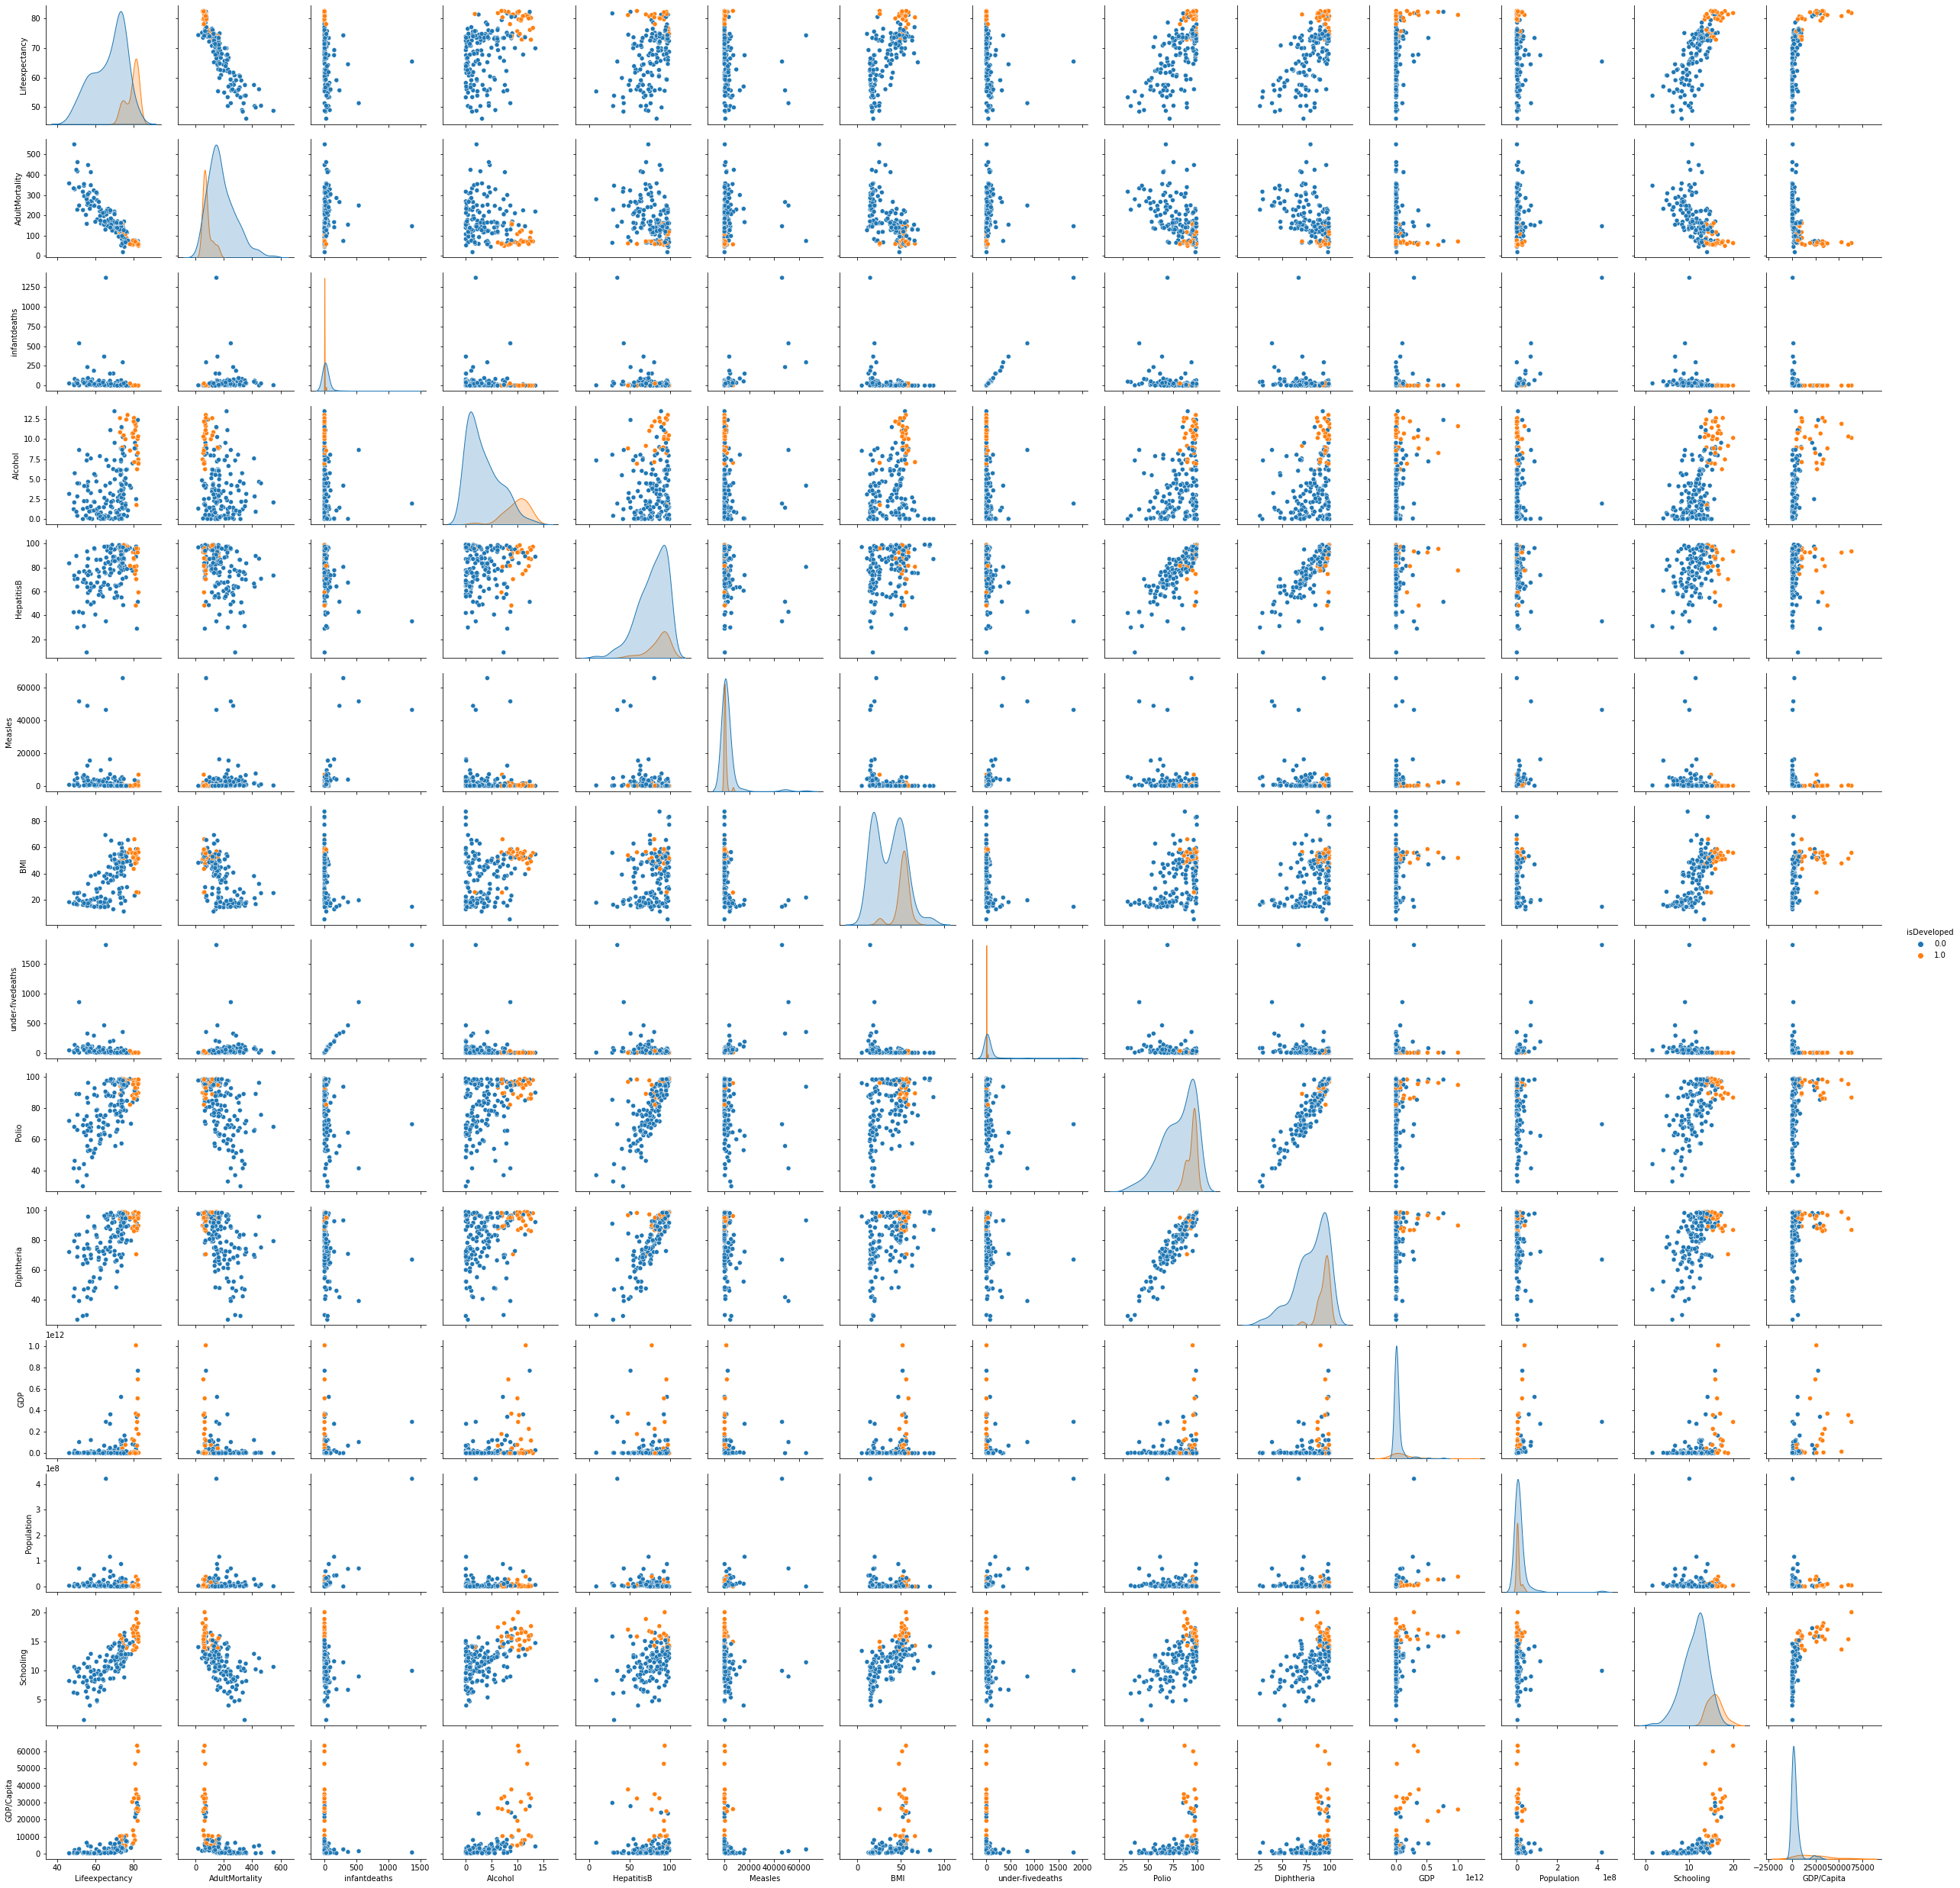

In [95]:
#Visualize correlations. 
sns.pairplot(dfLE, hue='isDeveloped')

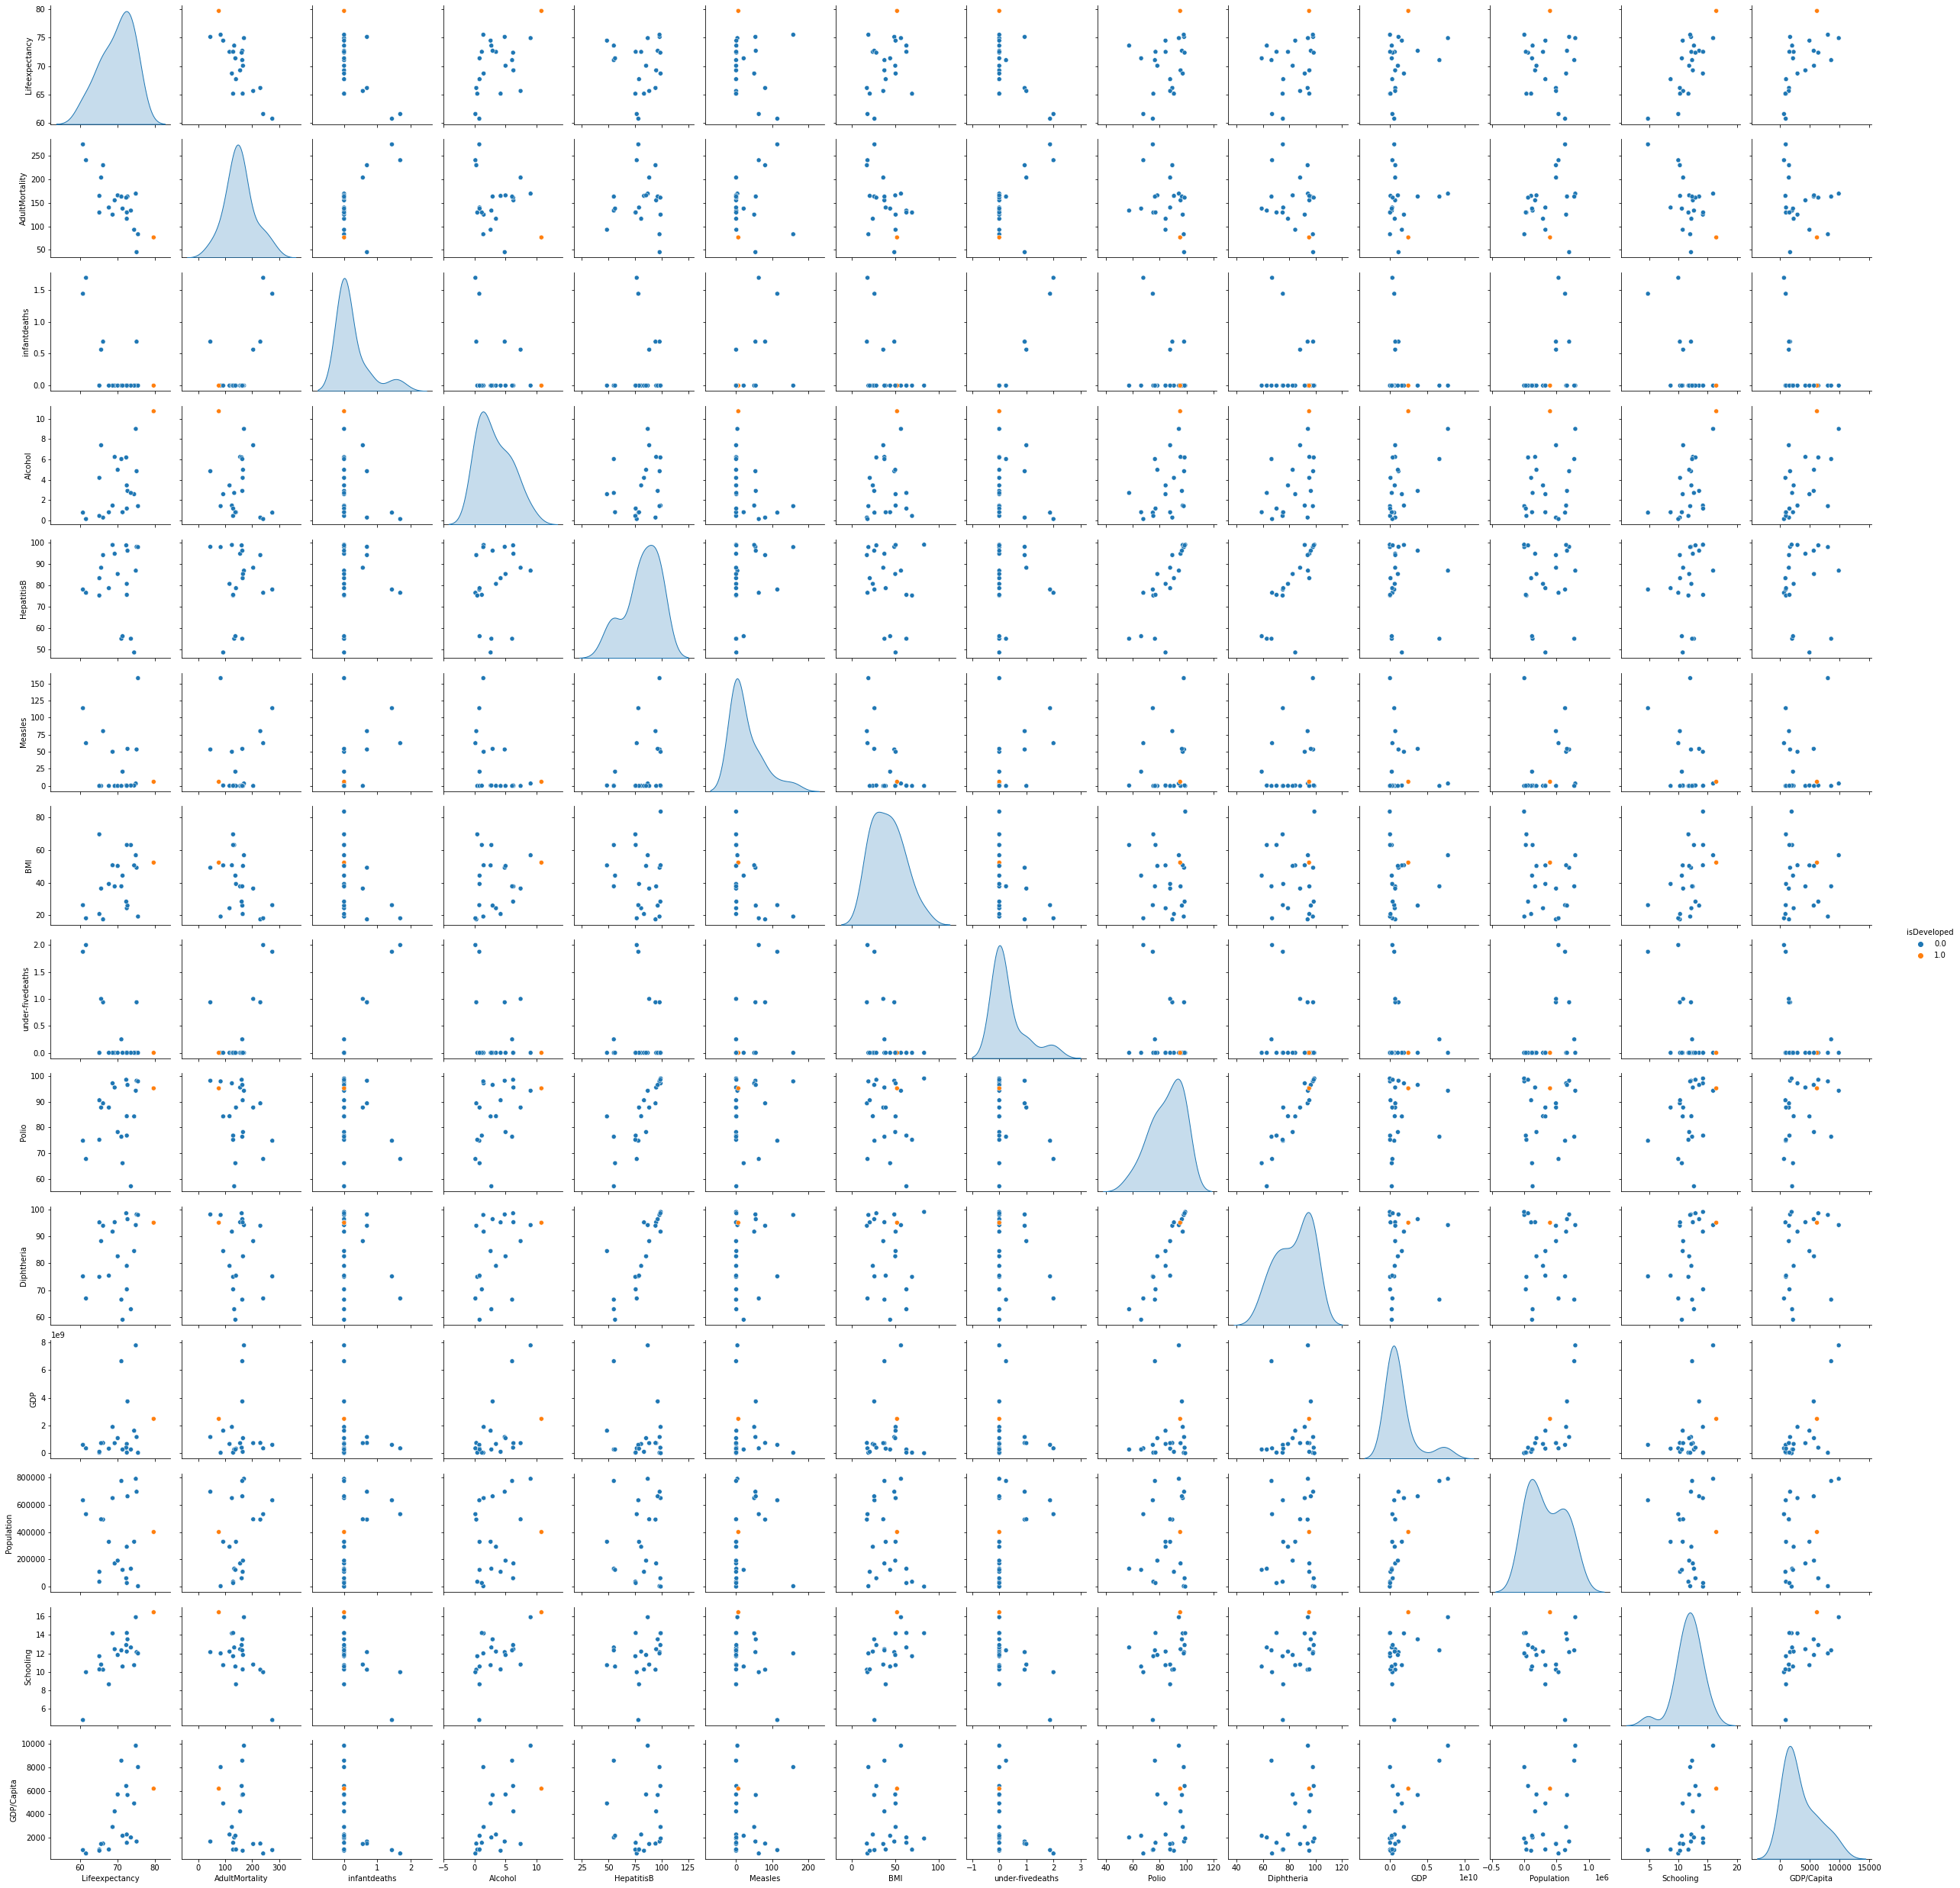

In [120]:
#Infantdeaths, Measles, under-fivedeaths, GDP, Population, GDP/Capita
dfLE = dfLE[dfLE["infantdeaths"] < 50]
dfLE = dfLE[dfLE["Measles"] < 200]
dfLE = dfLE[dfLE["under-fivedeaths"] < 3]
dfLE = dfLE[dfLE["GDP"] < 1.0e+10]
dfLE = dfLE[dfLE["Population"] < 1.0e+06]
dfLE = dfLE[dfLE["GDP/Capita"] < 10000]
sns.pairplot(dfLE, hue='isDeveloped')

I filtered out various huge outliers from the columns Infant Deaths, Measles, Under Five Deaths, GDP, Population, and GDP per Capita. They were filtered out due to just being extraordinarily huge values that would throw off any attempts at correlation detection. 

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [ ]:
#Calculate correlations and analyze. 
#Pearson and Spearman correlation calculations
#Do research on the three best correlated to Life Expectancy